In [1]:
import pandas as pd

df = pd.read_csv("Advertising Budget and Sales.csv")

# Limpieza
df.drop(columns=["Unnamed: 0"], inplace=True) # eliminar columna(s) no deseadas
df.columns = ["inversion_tv", "inversion_radio", "inversion_periodico", "ventas"]
df.head(2)


,inversion_tv,inversion_radio,inversion_periodico,ventas
0,230.1,37.8,69.2,221.0
1,44.5,39.3,45.1,104.0


In [2]:
# Remover duplicados
df.drop_duplicates(inplace=True)

In [3]:
# Revisar nulos
df.isnull().sum()

inversion_tv           0
inversion_radio        0
inversion_periodico    0
ventas                 0
dtype: int64

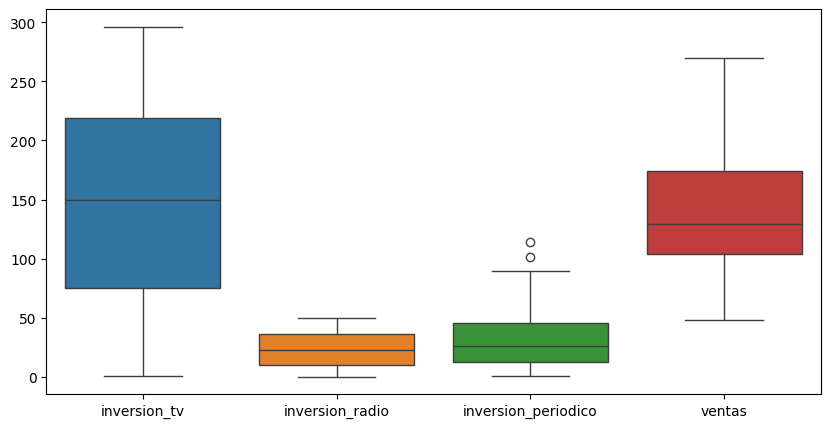

In [4]:
# Revisión de valores atípicos (outliers)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data = df)

plt.show()


In [5]:
df = df[ df.inversion_periodico < df.inversion_periodico.quantile(0.99)]

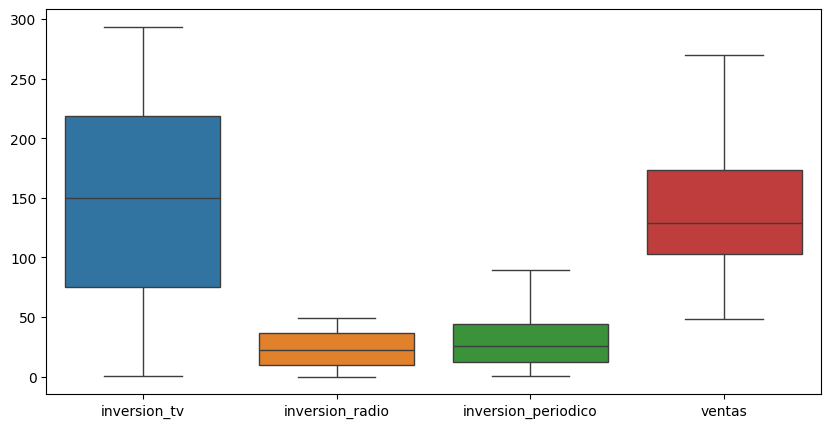

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df)

plt.show()

In [7]:
df.corr()

,inversion_tv,inversion_radio,inversion_periodico,ventas
inversion_tv,1.000000,0.061253,0.061974,0.773978
inversion_radio,0.061253,1.000000,0.346364,0.586250
inversion_periodico,0.061974,0.346364,1.000000,0.215642
ventas,0.773978,0.586250,0.215642,1.000000


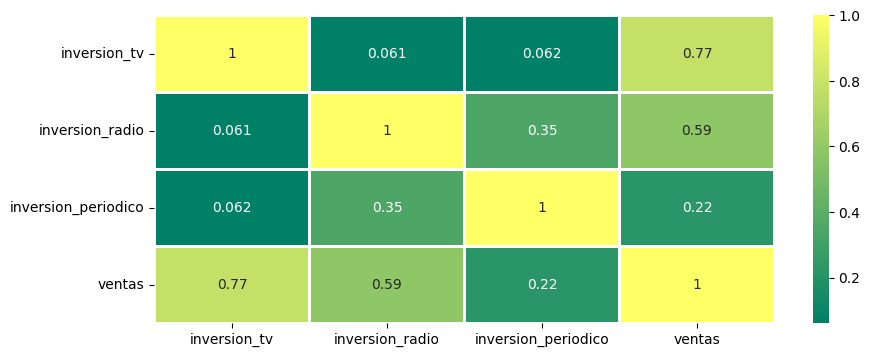

In [8]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), cmap="summer", annot=True, linewidths=1)
plt.show()

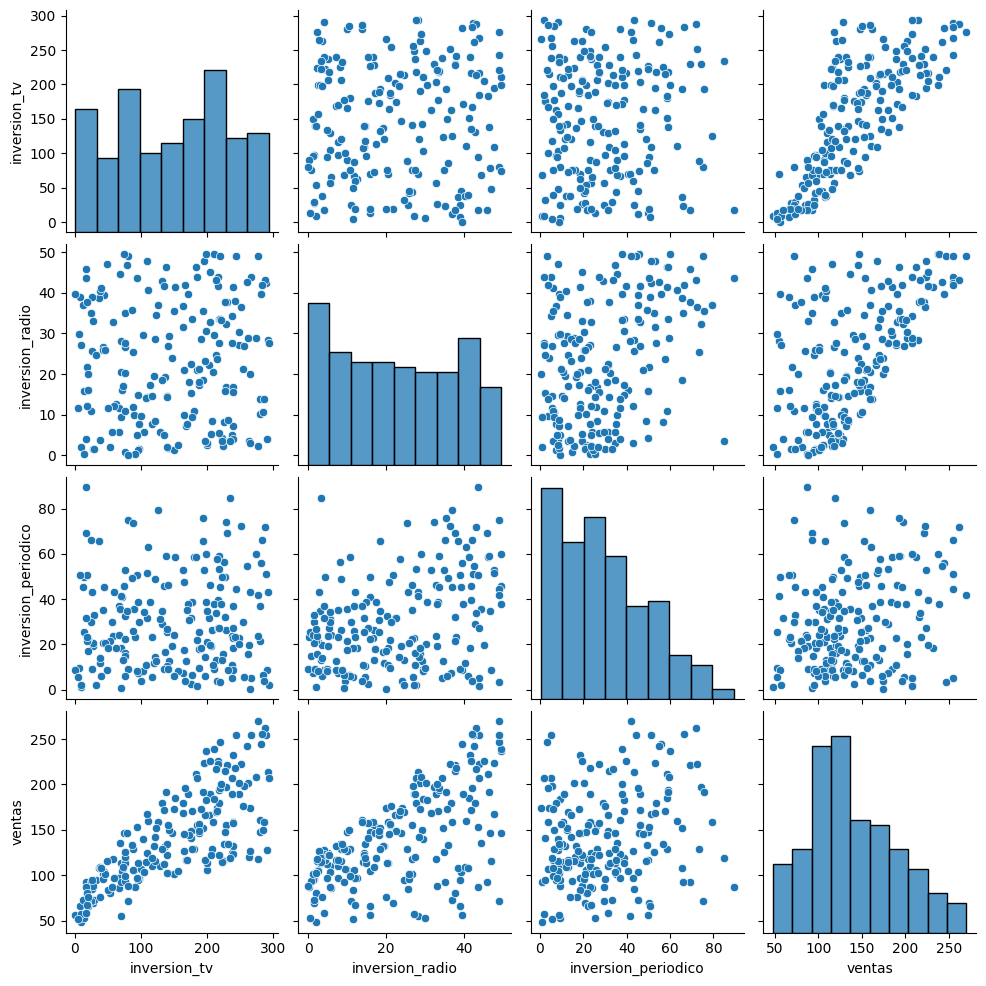

In [9]:
sns.pairplot(df)
plt.show()

# Regresión

Regresión es el proceso de obtener los **parámetros** de un **modelo** para ajustar una predicción. Tenemos variables independientes x como entradas del modelo para generar predicciones y. Para aprendizaje automático (machine learning), el objetivo es minimizar una función de pérdida ajustando los parámetros del modelo. Una función de pérdida común es la suma de los errores cuadrados entre los valores predichos.

### Regresión Lineal
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmuaxMwCvvDfVlYS8GZ9P3F80wesB1FofBOQ&usqp=CAU)


La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente y una variable independiente. 
La regresión lineal se puede utilizar tanto para la regresión lineal simple (una variable independiente) como para la regresión lineal múltiple (más de una variable independiente).


##### Regresión Lineal Simple
El objetivo de la regresión lineal es encontrar la línea que mejor se ajuste a través de un conjunto de puntos de datos, donde la línea está definida por una ecuación de la forma y = mx b, donde y es la variable dependiente, x es la variable independiente, m es la pendiente de la línea, y b es la intersección con el eje y.

\begin{align}
y = w  x + b \\
\end{align}


#### Predicción del precio de las casas con regresión lineal SIMPLE

#### 1. Carga de datos y análisis de dataset

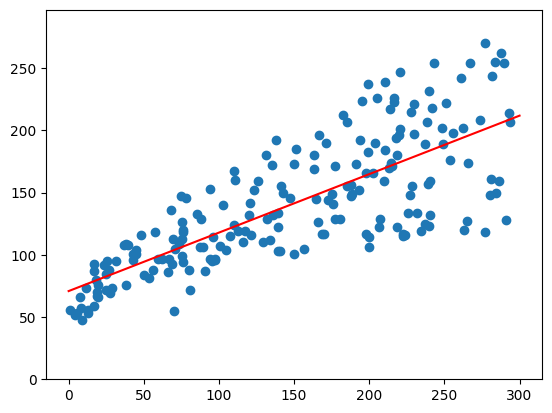

In [10]:
import numpy as np

w = 0.46989766
b = 70.87785470266061

x = np.linspace(0,300, 100)
y = w * x + b

plt.scatter(x= df.inversion_tv, y= df.ventas)
plt.plot(x, y, color="red")
plt.ylim(0, df.ventas.max()* 1.1)
plt.show()

In [11]:
df.head(3)

,inversion_tv,inversion_radio,inversion_periodico,ventas
0,230.1,37.8,69.2,221.0
1,44.5,39.3,45.1,104.0
2,17.2,45.9,69.3,93.0


In [12]:
df["ventas_pred"] = w * df.inversion_tv + b
df["error_cuadratico"] = (df.ventas - df.ventas_pred) ** 2
df

,inversion_tv,inversion_radio,inversion_periodico,ventas,ventas_pred,error_cuadratico
0,230.1,37.8,69.2,221.0,179.001306,1763.890275
1,44.5,39.3,45.1,104.0,91.788301,149.125603
2,17.2,45.9,69.3,93.0,78.960094,197.118948
3,151.5,41.3,58.5,185.0,142.067350,1843.212419
4,180.8,10.8,58.4,129.0,155.835352,720.136097
...,...,...,...,...,...,...
195,38.2,3.7,13.8,76.0,88.827945,164.556181
196,94.2,4.9,8.1,97.0,115.142214,329.139939
197,177.0,9.3,6.4,128.9,154.049741,632.509448
198,283.6,42.0,66.2,255.0,204.140831,2586.655063


In [50]:
df.error_cuadratico.mean()

14554.371818181819

### Errores del modelo

\begin{align}
\frac{1}{N}\sum_{i=1}^N(\hat{y_i} - y_i)^2 \\
\end{align}


\begin{align}
\hat{y_i} = \hat{w}  x_i + \hat{b} \\
\end{align}


In [13]:
df_w = pd.DataFrame(np.linspace(0,1,50), columns=["w"])
# df_w.columns= []

df_w.head(2)

,w
0,0.000000
1,0.020408


In [14]:
def calcularECM(w, df):
    df["ventas_pred"] = w * df.inversion_tv + b
    df["error_cuadratico"] = (df.ventas - df.ventas_pred) ** 2
    return df.error_cuadratico.mean()

df_w["ECM"] = df_w.w.apply(lambda w: calcularECM(w, df) )
df_w.head(3)

,w,ECM
0,0.000000,7419.949464
1,0.020408,6878.855327
2,0.040816,6361.783143


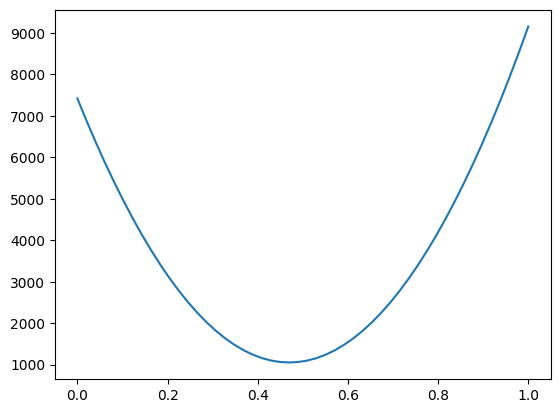

In [15]:
plt.plot(df_w.w, df_w.ECM)
plt.show()

In [16]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB 640.0 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.1 MB 388.9 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.1 MB 819.2 kB/s eta 0:00:12
   ----------- ---------------------------- 2.7/9.1 MB 15


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Con la librería sklearn
from sklearn import linear_model

# PASO 1
# Definir entradas para el entrenamiento(inputs)
x_train = np.array(df.inversion_tv).reshape(-1,1) # Independiente (la que influye) INVERSION TV
y_train = np.array(df.ventas) # Dependiente (a analizar) VENTAS

# PASO 2 
# Crear y entrenar el modelo
model = linear_model.LinearRegression() # Creación
model.fit(x_train, y_train)

print("w: \t", model.coef_)
print("b: \t", model.intercept_)

# PASO 3
# Predecir / poner a prueba nuestro modelo
x_predict = [[400],[450],[480]]
y_predict = model.predict(x_predict)
y_predict

w: 	 [0.46989766]
b: 	 70.87785470266061


array([258.83691841, 282.33180137, 296.42873115])

### Regresión Lineal Multiple
La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes.

\begin{align}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +... \\
\end{align}

x1, x2, x3,… son las variables independientes.

b0 = intercepto.

b1, b2, b3,… son los coeficientes.

In [18]:
# PASO 1
# Definir entradas para el entrenamiento(inputs)
X_train = np.array(df[["inversion_tv", "inversion_periodico"]]) # Independientes
y_train = np.array(df.ventas) # Dependiente (a analizar)

# PASO 2 
# Crear y entrenar el modelo
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print("w: \t", model.coef_)
print("b: \t", model.intercept_)

# PASO 3
# Predecir / poner a prueba nuestro modelo
x_predict= [[10, 150], [200,100]]
y_predict = model.predict(x_predict)
y_predict

w: 	 [0.46356442 0.42281512]
b: 	 59.22090395097453


array([127.27881601, 194.21530037])

### Regresión Logística

$$ f_{w,b}\left(x\right)=\frac{1}{1+e^{-\left(wx+b\right)}}$$

La regresión logística es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro. Normalmente, la predicción tiene un número finito de resultados, como un sí o un no.


#### Cargar los datos de diabetes.csv
Variables de interés:
* BMI: Índice de masa corporal. Es una métrica o KPI basada en el peso y la altura de cada persona. Un BMI muy alto puede ser indicativo de tener diabetes
* Outcome: Si la persona tiene diabetes o no

In [19]:
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [20]:
# PASO 1
# Definir entradas para el entrenamiento(inputs)
x_train = np.array(df_diabetes[["BMI"]])
y_train = np.array(df_diabetes.Outcome)

# PASO 2 
# Crear y entrenar el modelo
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

# PASO 3
# Predecir / poner a prueba nuestro modelo
x_predict = np.linspace(0, 68, 100).reshape(-1,1)
y_predict = model.predict(x_predict)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

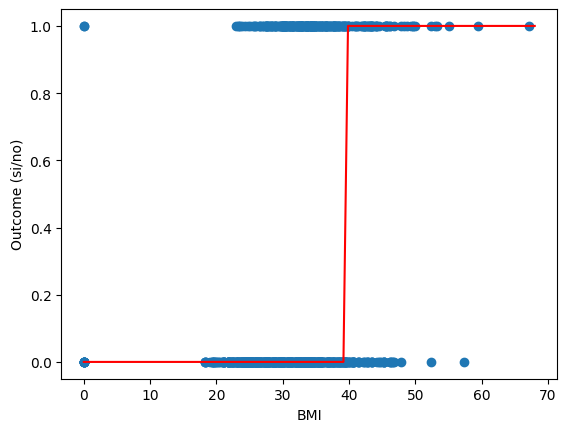

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_predict, y_predict, color="red")

plt.ylabel("Outcome (si/no)")
plt.xlabel("BMI")

plt.show()

In [22]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
# PASO 1
# Definir entradas para el entrenamiento(inputs)
x_train = np.array(df_diabetes[["BMI", "Glucose"]])
y_train = np.array(df_diabetes.Outcome)

# PASO 2 
# Crear y entrenar el modelo
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

# PASO 3
# Predecir / poner a prueba nuestro modelo
x_predict = [[40,180]]
y_predict = model.predict(x_predict)
y_predict

array([1], dtype=int64)